<a href="https://colab.research.google.com/github/Ciss48/Customer_Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Model phân khúc khách hàng bằng RFM và KMean

Note: Để phân khúc được khách hàng, có 1 vài thước đo quan trọng ta có thể sử dụng:
- R (Recentcy - Gần nhất): Lần cuối khách hàng mua sản phẩm
- F (Frequency - Tần suất):Tần suất khách hàng mua sản phẩm
- M (Montery value - Giá trị mà khách hàng bỏ ra): Khách hàng đã bỏ bao nhiêu tiền để mua sản phẩm

## Import dữ liệu và đọc thư viện

In [1]:
# Colab connect drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
# Read data
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/data/data_customer_segment_bank.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Làm sạch dữ liệu và thực hiện EDA, biến đổi dữ liệu để phục vụ đưa vào mô hình

In [4]:
#shape
df.shape

(541909, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [16]:
#Tìm hiểu xem tại sao quantity và unitprice lại có giá trị âm
df[(df['Quantity'] < 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [13]:
df[(df['UnitPrice'] < 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [17]:
# Loại bỏ những dòng có quantity và UnitPrice < 0
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [20]:
# Loại bỏ giá trị nan và lấy ngẫu nhiên 10,000 dòng (cho nhanh và đỡ tốn tài nguyên)
df_not_nan = df[df['CustomerID'].notna()]
df_not_nan = df_not_nan.sample(10000, random_state= 42)

In [21]:
df_not_nan.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,10000.000000,10000,10000.000000,10000.000000
mean,12.224500,2011-07-10 18:37:28.637999872,2.989548,15295.233600
min,1.000000,2010-12-01 09:34:00,0.040000,12347.000000
25%,2.000000,2011-04-05 10:55:00,1.250000,13970.500000
50%,6.000000,2011-07-31 13:58:00,1.950000,15156.500000
75%,12.000000,2011-10-21 08:55:15,3.750000,16794.000000
max,2000.000000,2011-12-09 12:50:00,600.000000,18287.000000
std,40.290081,NaN,8.049805,1714.411865


In [23]:
#Tính toán RFM

# Tính R - Recency
df_not_nan['InvoiceDate'] = pd.to_datetime(df_not_nan['InvoiceDate']) # Chuyển type về date

# Lấy ngày lớn nhất trong InvoiceDate + 1 (để làm ngày hiện tại trừ các ngày mua hàng gần nhất)
current_date = df_not_nan['InvoiceDate'].max() + dt.timedelta(days=1)

# Tính M - MontaryValue
df_not_nan['TotalPay'] = df_not_nan['Quantity'] * df_not_nan['UnitPrice']

# Group by CustomerID để tính R,F,M
df_customers = df_not_nan.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalPay': 'sum'
})

In [24]:
df_customers.head(5)

,InvoiceDate,InvoiceNo,TotalPay
CustomerID,,,
12347.0,40,7,129.70
12348.0,319,2,83.52
12349.0,19,1,12.50
12350.0,310,2,65.20
12352.0,36,4,421.65


In [25]:
# Rename
df_customers.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPay': 'MonetaryValue'
}, inplace=True)

## Chuẩn hóa dữ liệu, tối ưu điểm Skewness

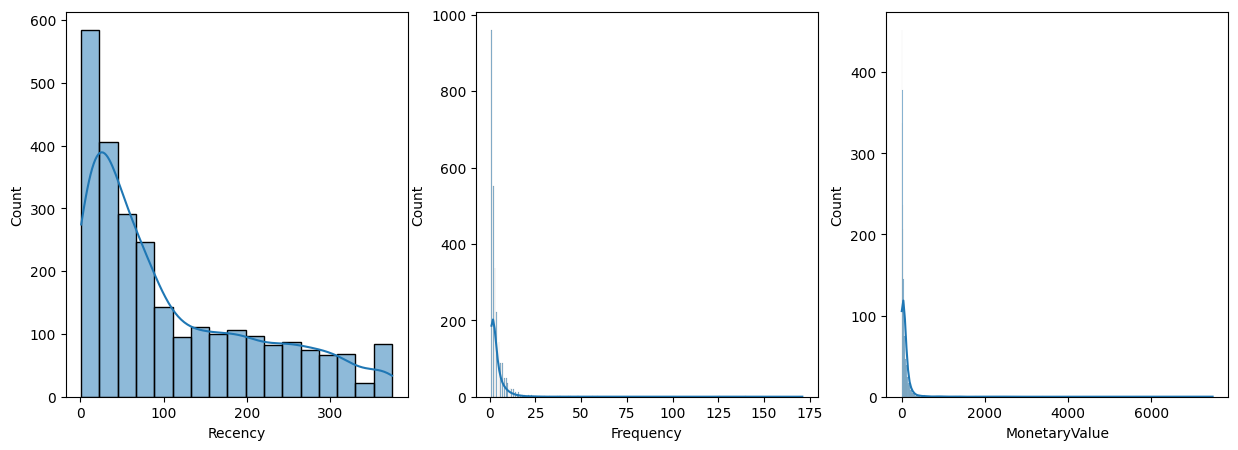

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Tắt tất cả các cảnh báo
warnings.filterwarnings('ignore')

# Vẽ phân phối
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df_customers['Recency'], kde=True, ax=axs[0])
sns.histplot(df_customers['Frequency'], kde=True, ax=axs[1])
sns.histplot(df_customers['MonetaryValue'], kde=True, ax=axs[2])

# Hiển thị biểu đồ
plt.show()

Các feature đang có phân phối khá bị lệch trái. Việc này sẽ làm cho model hoạt động không tốt => Tiến hành áp dụng 1 trong 4 phương pháp transfrom để đạt được điểm skewness tốt nhất:
- log transformation
- square root transformaion
- box-cox transformation
- cube root transformaion

In [28]:
# Tính toán độ lệch
print(df_customers['Recency'].skew())
print(df_customers['Frequency'].skew())
print(df_customers['MonetaryValue'].skew())

# Đang bị lệch phải

0.9419686415970923
13.18802368680814
14.910987361225443


In [29]:
# Hàm dùng cả 4 phương pháp để chuẩn hóa
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_skewness(x, customers):
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))

    # Vẽ biểu đồ phân phối
    sns.histplot(customers[x], kde=True, ax=ax[0, 0])
    ax[0, 0].set_title(f'Original - {x}')

    sns.histplot(np.log1p(customers[x]), kde=True, ax=ax[0, 1])
    ax[0, 1].set_title(f'Log Transformation - {x}')

    sns.histplot(np.sqrt(customers[x]), kde=True, ax=ax[1, 0])
    ax[1, 0].set_title(f'Square Root Transformation - {x}')

    sns.histplot(pd.Series(stats.boxcox(customers[x] + 1)[0]), kde=True, ax=ax[1, 1])
    ax[1, 1].set_title(f'Box-Cox Transformation - {x}')

    plt.tight_layout()
    plt.show()

    # Tính skewness cho từng phương pháp
    original_skew = customers[x].skew().round(2)
    log_skew = np.log1p(customers[x]).skew().round(2)
    sqrt_skew = np.sqrt(customers[x]).skew().round(2)
    boxcox_skew = pd.Series(stats.boxcox(customers[x] + 1)[0]).skew().round(2)

    # In kết quả skewness
    print(f"Skewness (Original): {original_skew}")
    print(f"Skewness (Log Transformation): {log_skew}")
    print(f"Skewness (Square Root Transformation): {sqrt_skew}")
    print(f"Skewness (Box-Cox Transformation): {boxcox_skew}")


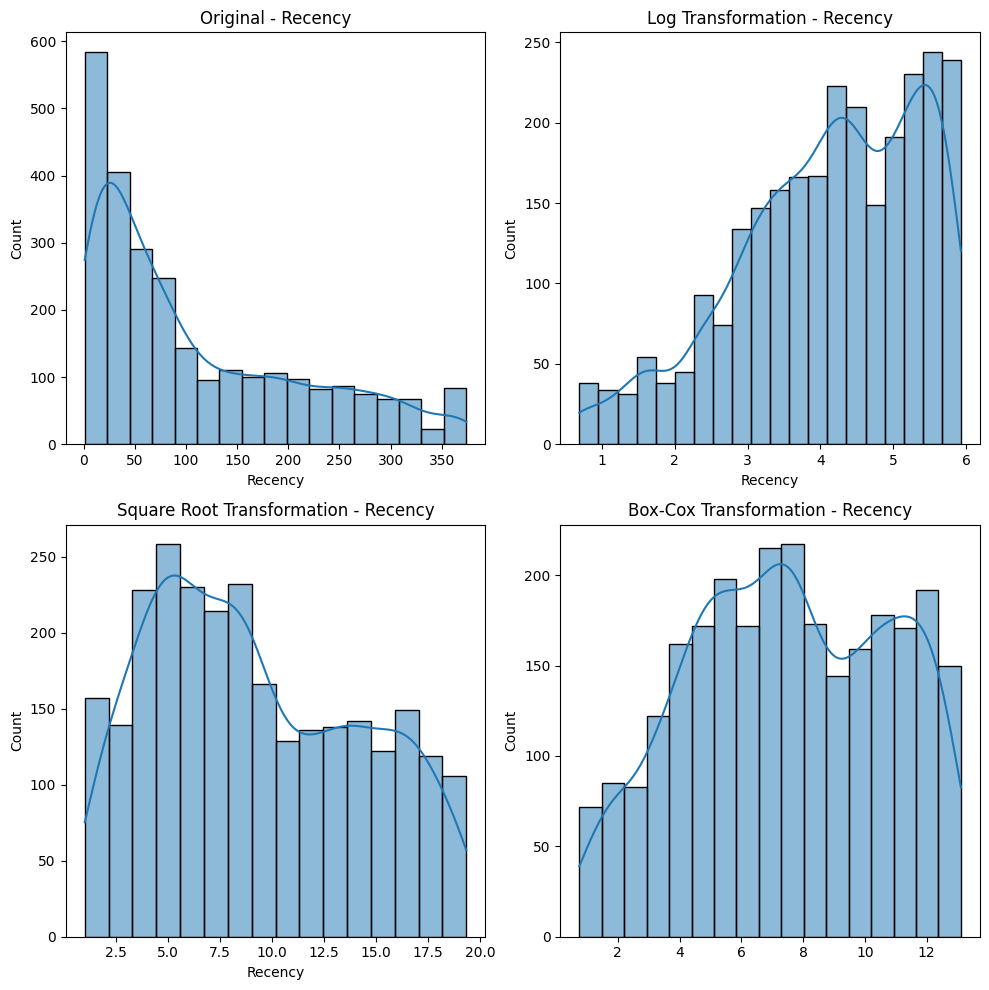

Skewness (Original): 0.94
Skewness (Log Transformation): -0.63
Skewness (Square Root Transformation): 0.32
Skewness (Box-Cox Transformation): -0.1


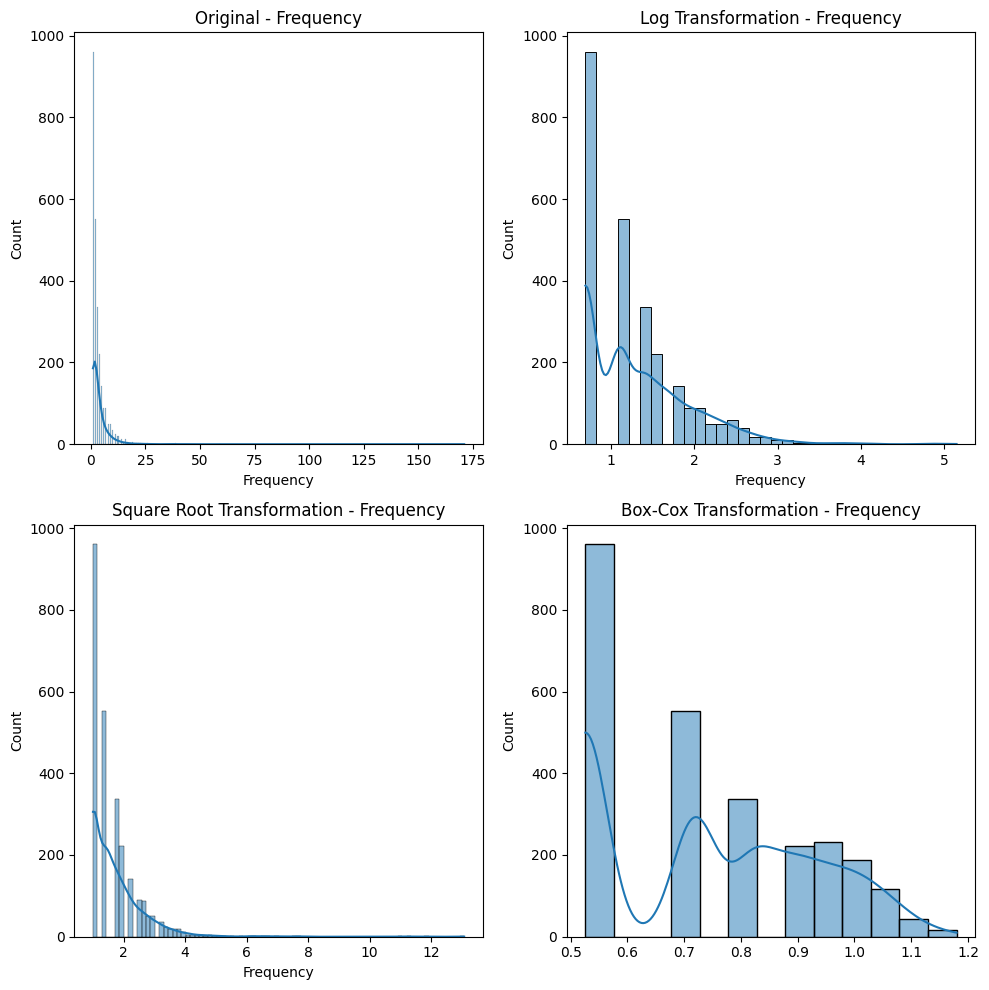

Skewness (Original): 13.19
Skewness (Log Transformation): 1.28
Skewness (Square Root Transformation): 3.52
Skewness (Box-Cox Transformation): 0.22


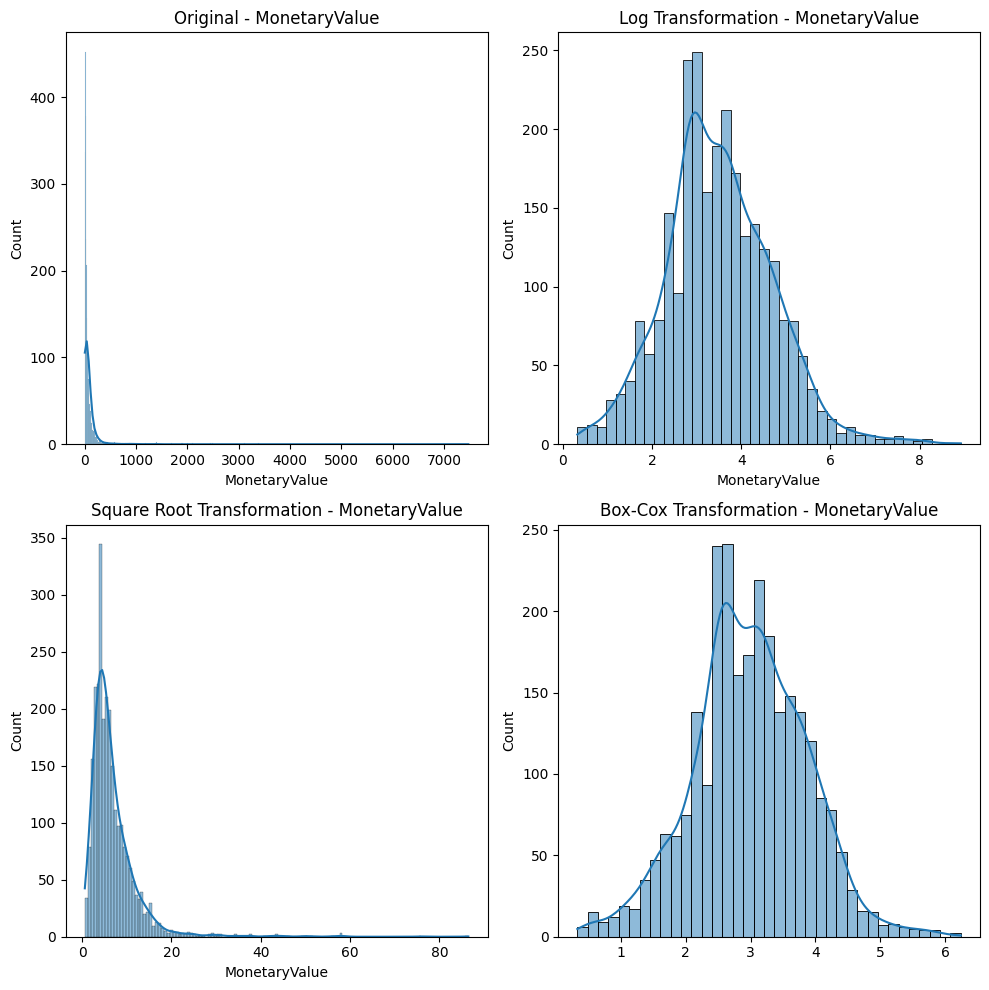

Skewness (Original): 14.91
Skewness (Log Transformation): 0.36
Skewness (Square Root Transformation): 4.71
Skewness (Box-Cox Transformation): -0.01


In [30]:
analyze_skewness('Recency', df_customers)
analyze_skewness('Frequency', df_customers)
analyze_skewness('MonetaryValue', df_customers)

In [34]:
# Tiến hành transform dữ liệu sau khi kiểm tra
df_customers_t = pd.DataFrame()
from scipy import stats
import numpy as np

# Sử dụng Box-Cox transformation
df_customers_t['Recency'] = stats.boxcox(df_customers['Recency'] + 1)[0]
df_customers_t['Frequency'] = stats.boxcox(df_customers['Frequency'] + 1)[0]
df_customers_t['MonetaryValue'] = stats.boxcox(df_customers['MonetaryValue'] + 1)[0]


In [35]:
df_customers_t.head()

,Recency,Frequency,MonetaryValue
0,5.992317,0.985814,3.986976
1,12.467875,0.718698,3.693907
2,4.384619,0.526067,2.334002
3,12.354376,0.718698,3.524829
4,5.745096,0.884620,4.723933


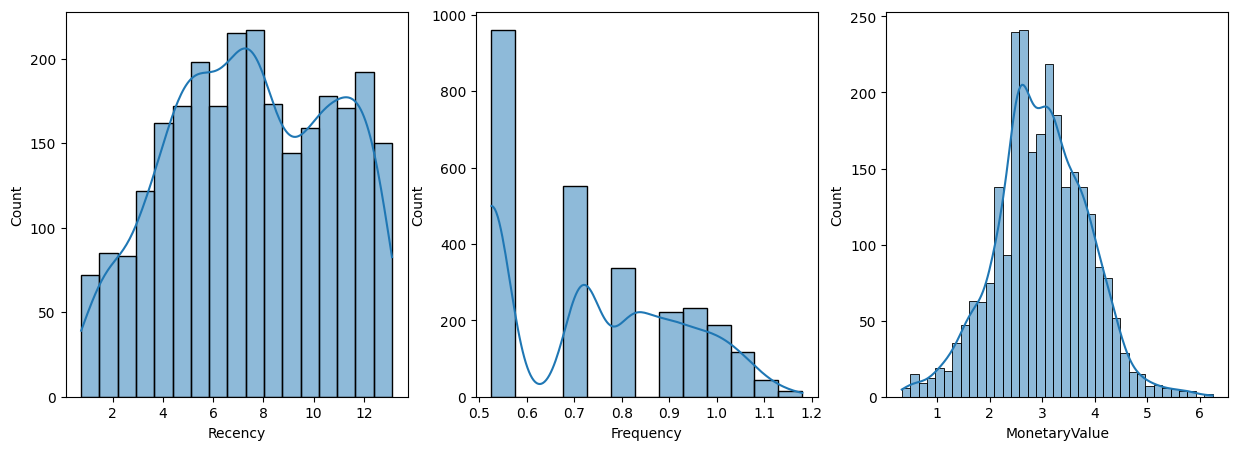

In [36]:
# Vẽ lại biểu đồ
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Tắt tất cả các cảnh báo
warnings.filterwarnings('ignore')

# Vẽ phân phối
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df_customers_t['Recency'], kde=True, ax=axs[0])
sns.histplot(df_customers_t['Frequency'], kde=True, ax=axs[1])
sns.histplot(df_customers_t['MonetaryValue'], kde=True, ax=axs[2])

# Hiển thị biểu đồ
plt.show()

## Scale dữ liệu, đưa vào mô hình KMeans

In [38]:
# Tiến hành scale dữ liệu
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_customers_scaled = scaler.fit_transform(df_customers_t)

In [39]:
df_customers_scaled

array([[-0.46970797,  1.32421369,  1.14548165],
       [ 1.52662219, -0.10618465,  0.81128754],
       [-0.96534032, -1.1377177 , -0.73944704],
       ...,
       [-1.8100062 ,  1.32421369,  1.2490105 ],
       [-1.71144474,  1.74487096,  0.39556111],
       [-0.17002398,  0.78232514,  0.82555985]])

In [40]:
pd.DataFrame(df_customers_scaled).head()

,0,1,2
0,-0.469708,1.324214,1.145482
1,1.526622,-0.106185,0.811288
2,-0.965340,-1.137718,-0.739447
3,1.491632,-0.106185,0.618483
4,-0.545923,0.782325,1.985852


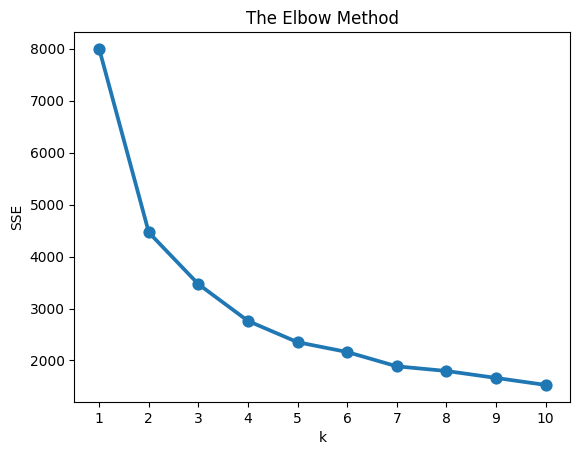

In [44]:
#Đưa dữ liệu vào Kmean

# Chọn số cụm bằng Elbow
# Chọn số cụm bằng Elbow
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_customers_scaled)
    sse[k] = kmeans.inertia_

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()


In [42]:
# => Chọn k = 3

In [43]:
model = KMeans(n_clusters=3, random_state = 42)
model.fit(df_customers_scaled)

KMeans(n_clusters=3, random_state=42)

## Áp dụng mô hình, phân cụm khách hàng, đánh giá cụm khách hàng

In [45]:
# Sau khi đã ra được model => Thêm 1 cột label để phân cụm vào dữ liệu gốc
df_customers['Cluster'] = model.labels_
df_customers.head()

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12347.0,40,7,129.70,0
12348.0,319,2,83.52,2
12349.0,19,1,12.50,1
12350.0,310,2,65.20,2
12352.0,36,4,421.65,0


In [46]:
#Như vậy là có 3 cụm khách hàng đã được phân, để đánh giá xem các cụm này có tính chất như nào, ta sẽ đánh giá:
df_customers.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(2)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         43.01      7.30        164.74  1001
1         47.43      1.43         14.66   652
2        217.16      1.74         39.73  1012

Đánh giá:
- Cụm 0: Mua hàng gần đây, tần suất nhiều, giá trị nhiều => Đây là tệp khách hàng tốt, cần chăm sóc đặc biệt để giữ chân khách hàng
- Cụm 1: Mua hàng gần đây, tần suất ít, giá trị ít => Đây là tệp khách hàng mới, trung bình, cần áp dụng 1 vài chương trình để thúc đẩy mua hàng
- Cụm 2: Mua hàng lâu, tần suất ít, giá trị trung bình => Đây là tệp khách hàng tệ, có tỷ lệ rời bỏ rất cao. Cần tìm hiểu lý do rời bỏ

## Code mẫu để đánh giá các phương pháp tối ưu điểm skewness và code mẫu để transform sau khi đánh giá xong

In [ ]:
# Đánh giá xem phương pháp nào là tốt nhất và có thể dùng
# Hàm dùng cả 4 phương pháp để chuẩn hóa
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_skewness(x, customers):
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))

    # Vẽ biểu đồ phân phối
    sns.histplot(customers[x], kde=True, ax=ax[0, 0])
    ax[0, 0].set_title(f'Original - {x}')

    sns.histplot(np.log1p(customers[x]), kde=True, ax=ax[0, 1])
    ax[0, 1].set_title(f'Log Transformation - {x}')

    sns.histplot(np.sqrt(customers[x]), kde=True, ax=ax[1, 0])
    ax[1, 0].set_title(f'Square Root Transformation - {x}')

    sns.histplot(pd.Series(stats.boxcox(customers[x] + 1)[0]), kde=True, ax=ax[1, 1])
    ax[1, 1].set_title(f'Box-Cox Transformation - {x}')

    plt.tight_layout()
    plt.show()

    # Tính skewness cho từng phương pháp
    original_skew = customers[x].skew().round(2)
    log_skew = np.log1p(customers[x]).skew().round(2)
    sqrt_skew = np.sqrt(customers[x]).skew().round(2)
    boxcox_skew = pd.Series(stats.boxcox(customers[x] + 1)[0]).skew().round(2)

    # In kết quả skewness
    print(f"Skewness (Original): {original_skew}")
    print(f"Skewness (Log Transformation): {log_skew}")
    print(f"Skewness (Square Root Transformation): {sqrt_skew}")
    print(f"Skewness (Box-Cox Transformation): {boxcox_skew}")


In [ ]:
# Chạy hàm đánh giá
analyze_skewness('column_name', df)

In [ ]:
# Transfrom
df_customers['Recency_log'] = np.log1p(df_customers['Recency']) #Log Transformation
df_customers['Recency_sqrt'] = np.sqrt(df_customers['Recency']) #Square Root Transformation
from scipy.stats import boxcox
df_customers['Recency_boxcox'], _ = boxcox(df_customers['Recency'] + 1) # Boxcox